# Аналитика в авиакомпании

Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки (сотни перелётов каждый день)  
Для руководства необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления.

**Цель:**  
Необходимо изучить данные и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

**Исходные данные:**  
2 файла формата .csv, содержащие результаты запросов к базе данных.  

<h1>Оглавление<span class="tocSkip"></span></h1>
<br></br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-данных-и-изучение-общей-информации" data-toc-modified-id="Открытие-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие данных и изучение общей информации</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Топ 10 городов по количеству рейсов</a></span></li><li><span><a href="#Распределение-параметров" data-toc-modified-id="Распределение-параметров-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Распределение параметров</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Заключение</a></span></li></ul></div>

## Открытие данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    query1 = pd.read_csv('/datasets/query_1.csv')
    query3 = pd.read_csv('/datasets/query_3.csv')
except:
    query1 = pd.read_csv('query_1.csv')
    query3 = pd.read_csv('query_3.csv')

In [3]:
query1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
query3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропущенные значения в данных отсутствуют, типы данных корректны. По таблице `query1` уже видно, какие модели самолетов летают чаще, но о причинах мы не можем сказать, не изучив дополнительную информацию. По таблице `query3` можно заметить, что Россия - большая страна (только в данной выборке одной авиакомпании есть данные по 101 городу, содержащие аэропорты)

## Топ 10 городов по количеству рейсов

Для понимания, в какие города чаще летают в августе 2018 года, определим 10 городов по наибольшему количеству рейсов

In [7]:
query3.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


На 1 месте с большим отрывом находится Москва - столица России. В данном городе наиболее часто проводятся масштабные мероприятия, также Москва является основным пунктом назначения для приезжающих туристов и местом для пересадки для проезда в отдаленные уголки России.  
На 2 месте Санкт-Петербург, в народе называемая "культурная столица России" и соответственно, Санкт-Петербург как пункт назначения также востребован, но в меньшей степени (меньше в 4 раза по данным таблицы).  
С 3 по 10 идут города-миллионики, которые являются также в основном пунктом пересадки для проезда в отдаленные уголки России.  
Выделяются из списка Сочи и Ульяновск - это города, куда часто приезжают отдохнуть, подлечиться, полежать на пляжике, одним словом "курортные". Учитывая, что выборка сделана на август 2018, то логично, что данные города попали в топ 10.

## Распределение параметров

Построим график распределения количества рейсов в сентябре 2018 года по каждой модели самолетов 

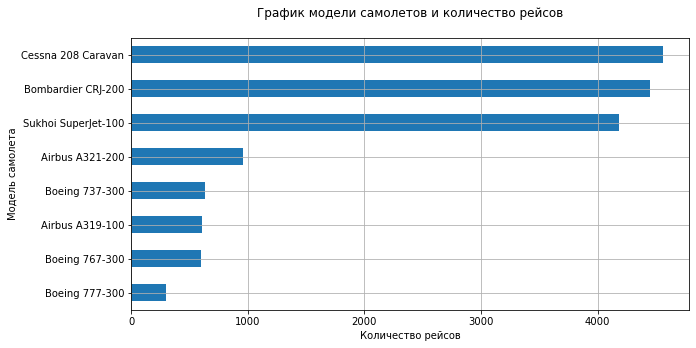

In [8]:
query1.sort_values(by='flights_amount').plot(kind='barh', x='model', y='flights_amount', legend = False, grid = True, figsize=(10,5));
plt.xlabel('Количество рейсов'), plt.ylabel('Модель самолета')
plt.title('График модели самолетов и количество рейсов\n')
plt.show()

Без дополнительных данных сложно сделать выводы, так как сами названия моделей самолетов ничего о себе не говорят (для незначющих). В рамках проекта рассмотрим одну из важных характеристик, на которую смотрят многие пассажиры - вместимость самолета. Инфомацию о вместимости найдем на просторах Интернета

In [9]:
temp = pd.DataFrame({'model':['Airbus A319-100', 'Airbus A321-200', 'Boeing 737-300',
       'Boeing 767-300', 'Boeing 777-300', 'Bombardier CRJ-200',
       'Cessna 208 Caravan', 'Sukhoi SuperJet-100'], 'max_capacity':[124, 220, 149, 350, 451, 50, 13, 108]})

In [10]:
query1.merge(temp, how='outer', on='model').sort_values(by='flights_amount', ascending = False)

,model,flights_amount,max_capacity
6,Cessna 208 Caravan,4557,13
5,Bombardier CRJ-200,4446,50
7,Sukhoi SuperJet-100,4185,108
1,Airbus A321-200,960,220
2,Boeing 737-300,630,149
0,Airbus A319-100,607,124
3,Boeing 767-300,600,350
4,Boeing 777-300,300,451


Добавив параметр **вместительность** мы можем сделать некоторые выводы о количестве рейсов в сентябре 2018. **Самолеты с малой вместительностью летают чаще, чем пассажирские авиалайнеры**. Это объясняется тем, что самолет с малой вместительностью летает на малые расстояния и меньше по времени, таким образом у самолетов с малой вместительностью может быть по несколько рейсов в день. Большие пассажирские лайнеры летают на большие расстояния, также им необходимо время на загрузку и выгрузку такого количества пассажиров, заправку и осмотр тех. состояния.  
  
Мы рассмотрели только один фактор влияния, но могут быть и другие, такие как "количество самолетов каждой модели", ведь если у компании 10 штук Boeing 737-300 и 200 штук Cessna 208 Caravan, то и разница в количестве рейсов уже будет более логична.  
В данном рабочем моменте я бы посоветовала обратиться к заказчику и определить, на какие именно вопросы необходимо ответить. Но грамотным процесс будет, если эти вопросы определены до обработки и анализа данных

Построим график распределения количества рейсов в августе 2018 года по всем городам и по Топ 10

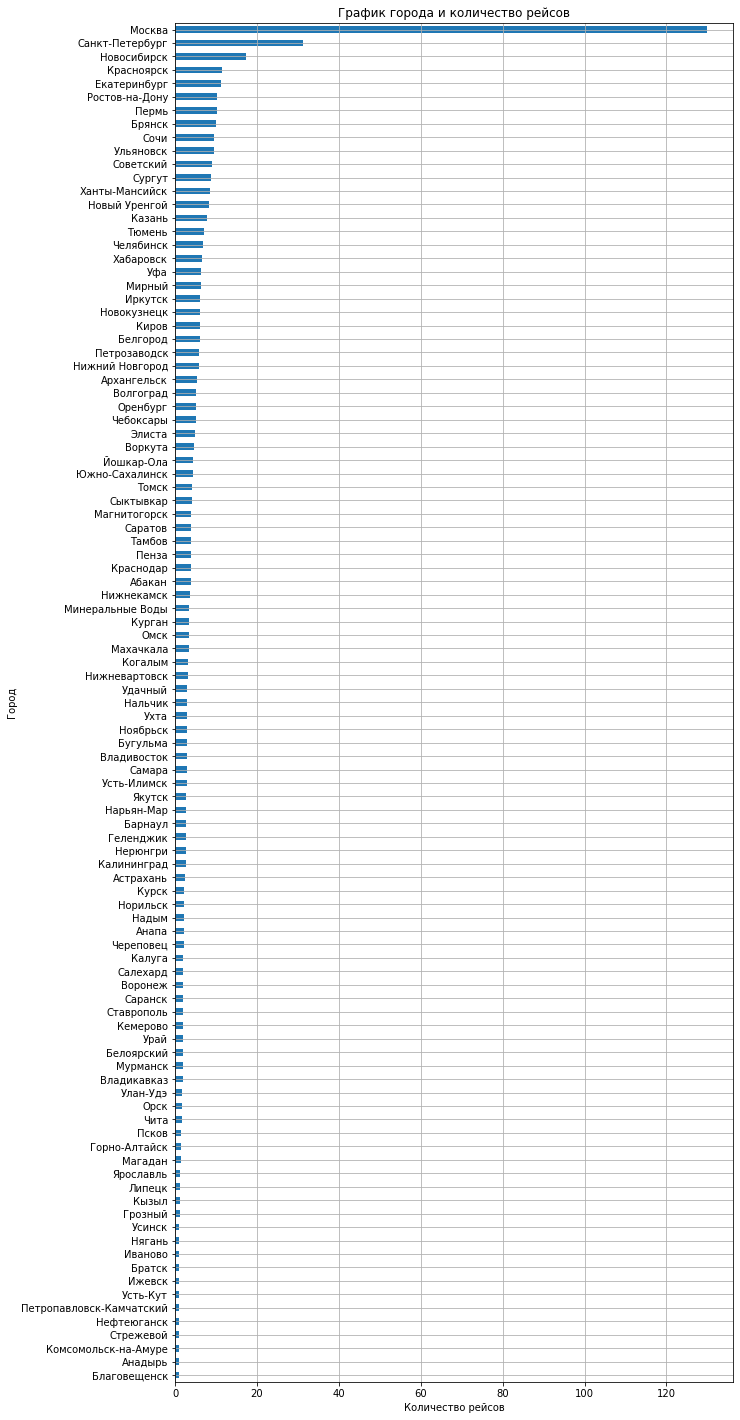

In [11]:
query3.sort_values(by='average_flights').plot(kind='barh', x='city', y='average_flights', figsize=(10,25), legend = False, grid = True);
plt.xlabel('Количество рейсов'), plt.ylabel('Город')
plt.title('График города и количество рейсов')
plt.show()

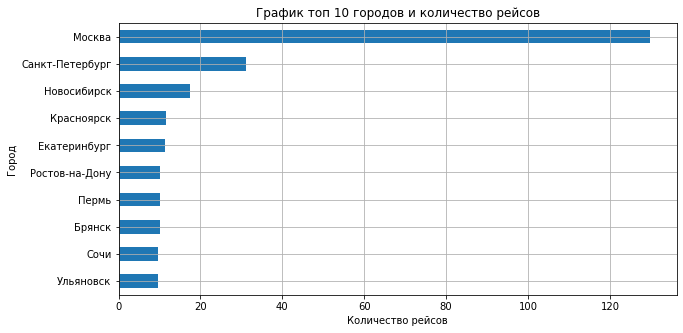

In [12]:
query3.sort_values(by='average_flights', ascending = True).tail(10).plot(kind='barh', x='city', y='average_flights', legend = False, grid = True, figsize=(10,5));
plt.xlabel('Количество рейсов'), plt.ylabel('Город')
plt.title('График топ 10 городов и количество рейсов')
plt.show()

Распределение Топ 10 городов мы уже анализировали в пункте 2. Посмотрев на все города в целом, можно лишь сказать, что и в отдаленные уголки России летают самолеты хотя бы 1-2 раза в месяц. У Москвы наибольшее число рейсов, это логично, так как Москва является столицей России и имеет не один аэропорт, а также чаще всего в Москву прилетают для пересадки, т.к. прямой рейс либо дороже, либо его нет. 

## Заключение

По полученным данным о самолетах и количестве рейсов можно предположить, что модели самолетов `Cessna 208 Caravan`, `Bombardier CRJ-200` и `Sukhoi SuperJet-100` с количеством рейсов в сентябре 2018 4557, 4446 и 4185 соответственно являются самыми востребованными. Предположительно причина во вместимости самолета: `Cessna 208 Caravan` имеет 13 посадочных мест для пассажирова, `Bombardier CRJ-200` имеет 50 мест, а `Sukhoi SuperJet-100` имеет 108 мест.  
  
По данным о рейсах в города России за август 2018 можно сказать, что наибольшее количество рейсов проводятся в Москву = около 130. Это вполне логично, так как Москва является столицей России и имеет не один аэропорт, а также чаще всего в Москву прилетают для пересадки, т.к. прямой рейс либо дороже, либо его нет. Если мы посмотрим на график фестивалей, то в Москве они проводятся каждый месяц.  
  
Второй по количеству рейсов - в Санкт-Петербург = 31, и так как фестиваля в августе 2018 в Санкт-Петербурге нет, то и ответить на поставленный в начале работы вопрос о спросе пассажиров на рейсы в города, где проходят крупнейшие фестивали мы не можем ответить. Но можем предположить, что такое количество рейсов по причине того, что Санкт-Петербург является вторым городом по величине населения граждан, а также называемый "культурной столицей России" и соответственно, Санкт-Петербург как пункт назначения также востребован, но в меньшей степени чем Москва.  
  
В августе 2018 также проходили фестивали в Нижнем Новгороде, Иркутске и Твери. Количество рейсов в данные города 6, 6 и 0 соответственно. Данные цифры говорят об отсутствии спроса пассажиров на рейсы в города, где проходят крупнейшие фестивали. Москва и Санкт-Петербург являются исключениями, так как много иных причин востребованности рейсов в данные города.